# Data Statistics and Evaluation

In the following demo, we will:
* Calculate total number of hours recorded for each site and locate files which could not be read with TuneR's readwave function.
* Calculate Summary Statistcs for each Bioacoustic Index
* Visualization of Indices
* Cluster Analysis (for indices)
* Correlation Analysis (for indices)
* Cluster Analysis following Correlation Analysis. 

In [2]:
library(tuneR)
library(tidyr)
library(ggplot2)
library(factoextra)
library(cluster)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## Basic Sound Data Statistics and Data 

The following code gives the hours recorded at each site (along with the total. Uncommenting the the expressions in the warning/error brackets also gives the files which could not be processed using TuneR's readWave function along with why the function fails (8 failed files). Errors include:
* bin-reading error(2 files): ``` <simpleError in readBin(con, int, n = 4, size = 1, endian = "little", signed = FALSE) %*% 2^c(0, 8, 16, 24): non-conformable arguments> ```
* char-reading error(3 files): ``` <simpleError in readChar(con, 4): invalid UTF-8 input in readChar()> ```
* non-valid WAVE file(3 files): ``` <simpleError in readWave(soundfile, header = TRUE): This seems not to be a valid RIFF file of type WAVE.> ```

In [5]:
DATA_LIBRARY_PATH<- "/media/colton/My Passport/data_library"
file.paths <- list.files(DATA_LIBRARY_PATH)
total <- 0
nonproblem_files <- 0
total_files <- 0
for (i in 1:length(file.paths)){
  duration <- 0
  sitepath <- paste(DATA_LIBRARY_PATH,file.paths[i],sep='/')
  sitefiles <- list.files(sitepath,recursive=TRUE, pattern = "wav$")
  for (j in 1:length(sitefiles)){
    soundfile <- paste(sitepath,sitefiles[j],sep='/')
    total_files <- total_files + 1
    result <- tryCatch(expr={
    hdr <- readWave(soundfile,header=TRUE)
    sr <- hdr$sample.rate
    samples<-hdr$samples
    duration <- duration + samples/(sr*3600)
    nonproblem_files <- nonproblem_files + 1
    }, warning = function(w) {
      #print(w)
      #print(soundfile)
    }, error = function(e) {
      #print(e)
      #print(soundfile)
    })
}
  total <- duration + total
  print(paste(file.paths[i],duration,sep=": "))
}
print(paste("Total",total,sep=": "))
print(paste("Non-Problem Files",nonproblem_files,sep=": "))
print(paste("Total Files",total_files,sep=": "))

[1] "Audubon_Society: 29.3517748148148"
[1] "Biosphere_2: 27.2658311111111"
[1] "Chuparosa_Inn: 21.59808"
[1] "Desert_museum: 39.1802755555556"
[1] "Empire_Ranch: 24.7657748148148"
[1] "Gates Pass: 123.29344"
[1] "Jake: 91.3273303703704"
[1] "Nirav: 95.5661096296297"
[1] "Patagonia_lake: 25.5610548148148"
[1] "Paton_Hummingbird: 24.87544"
[1] "Proctor_road: 24.993522962963"
[1] "Ruth: 111.326684444445"
[1] "Sabino_canyon: 50.0686074074074"
[1] "Saguaro_NP: 136.065831111111"
[1] "Silvestrer_Spring: 24.6300503703704"
[1] "Sweetwater: 140.433386666667"
[1] "Theresa: 105.168971851852"
[1] "Tumamoc: 163.181576296296"
[1] "Total: 1258.65374222222"
[1] "Non-Problem Files: 1301"
[1] "Total Files: 1309"


In [3]:
INDEX_CSV <- "/media/colton/My Passport/final.csv"
index_data <- read.csv(INDEX_CSV,header=TRUE)
head(index_data)

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,spectral_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_evenness....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Audubon_Society,2019-04-18,11:12:36,101.0132,0.09830943,0.9724801,0.8142960,0.7918867,1.811299,0.514931,196.6844,1,0.4799106
2,Audubon_Society,2019-04-18,11:17:36,113.4433,0.11335600,0.9730184,0.8080708,0.7862678,1.767159,0.539738,201.1060,0,0.8579672
3,Audubon_Society,2019-04-18,11:22:36,125.1966,0.20363086,0.9820155,0.7945508,0.7802612,1.744127,0.557559,196.8785,0,0.5911719
4,Audubon_Society,2019-04-18,11:27:36,147.6329,0.16143239,0.9848378,0.7754547,0.7636971,1.768792,0.530202,211.8268,0,0.8497890
5,Audubon_Society,2019-04-18,11:32:36,120.6462,0.18025170,0.9826372,0.7972910,0.7834478,1.733753,0.558135,199.5438,1,0.5483259
6,Audubon_Society,2019-04-18,11:37:36,150.6320,0.09876261,0.9809657,0.7997804,0.7845571,1.580442,0.617017,191.5337,0,0.7192530


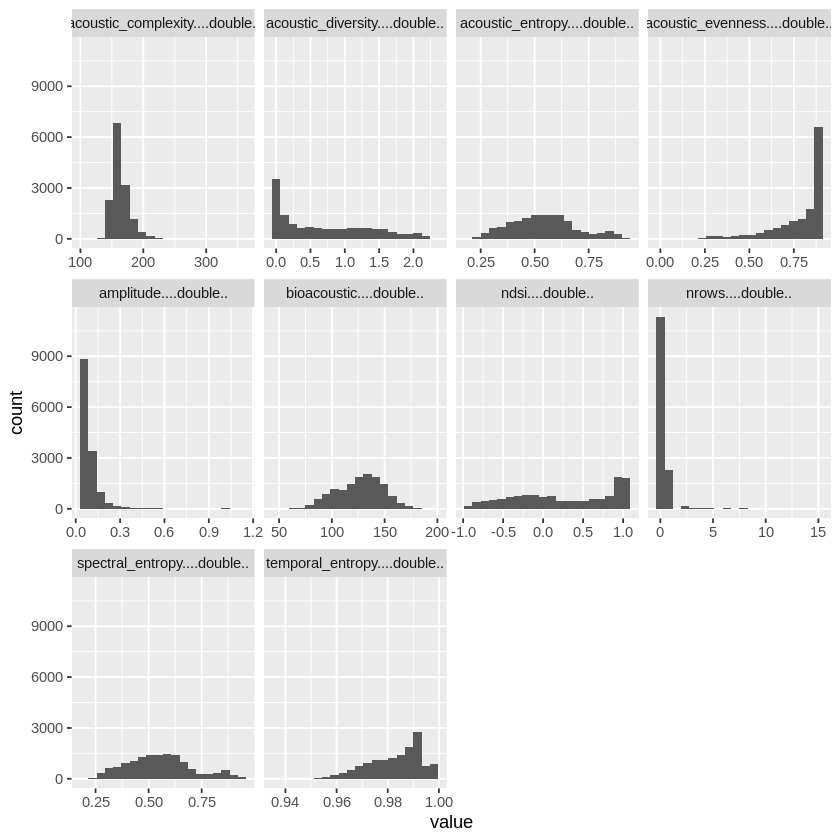

In [7]:
ggplot(gather(index_data[,4:13]), aes(value)) + 
    geom_histogram(bins = 20) + 
    facet_wrap(~key, scales = 'free_x')

In [8]:
summary(index_data)

            Site      Date....as.Date.character....format.....Y..m..d..
 Tumamoc_NA   :1827   2019-04-14:  542                                 
 Sweetwater_NA:1571   2018-09-07:  528                                 
 Saguaro_NP   :1522   2018-09-08:  528                                 
 Gates_Pass   :1379   2019-06-09:  528                                 
 Ruth_NA      :1231   2019-06-10:  528                                 
 Theresa_NA   :1197   2019-06-11:  528                                 
 (Other)      :5366   (Other)   :10911                                 
 Time....character.. bioacoustic....double.. amplitude....double..
 15:0:0 :   54       Min.   : 48.39          Min.   :0.03201      
 15:10:0:   53       1st Qu.:110.06          1st Qu.:0.04953      
 15:15:0:   53       Median :128.44          Median :0.06864      
 15:5:0 :   53       Mean   :126.22          Mean   :0.09350      
 2:0:0  :   53       3rd Qu.:142.35          3rd Qu.:0.10508      
 2:10:0 :   53       M

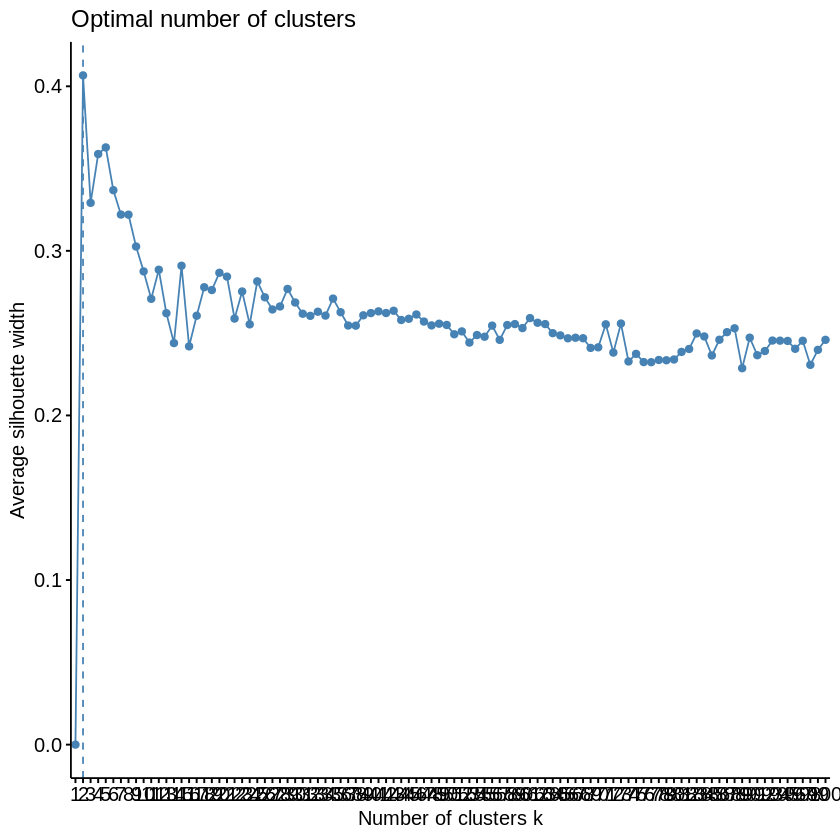

In [8]:
fviz_nbclust(index_data[,4:13],FUNcluster=clara,method = "silhouette",k.max=100,verbose=TRUE)